In [13]:
import pandas as pd

df = pd.read_csv('memes2.csv')
len(df)

31123

In [4]:
df.columns
#Get 9th and 13th columns
underrep_with_mul = df.loc[:, ['ref_image', 'image_count']]
#label columns 'class' and 'diff'
underrep_with_mul.columns = ['class', 'diff']
#conert column class to string
underrep_with_mul['class'] = underrep_with_mul['class'].astype(str)
underrep_with_mul['class'] = underrep_with_mul['class'].apply(lambda x: x.split('_')[0])
#replace '%' with '' in column class
underrep_with_mul['class'] = underrep_with_mul['class'].apply(lambda x: x.replace('%', ''))
#create dict from dataframe
underrep_with_mul = underrep_with_mul.set_index('class').T.to_dict('list')

C:\Users\Murgi\AppData\Local\Temp\ipykernel_4524\1533664773.py:12: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  underrep_with_mul = underrep_with_mul.set_index('class').T.to_dict('list')


In [100]:
from PIL import Image
import os

def processImage(save_location,infile):
    im = Image.open(infile)
    #get filename without extension
    filename = os.path.splitext(os.path.basename(infile))[0]
    # get extension
    extension = os.path.splitext(os.path.basename(infile))[1]
    # if image is gif
    if extension == '.gif':
        i = 0
        mypalette = im.getpalette()
        try:
            while 1:
                im.putpalette(mypalette)
                new_im = Image.new("RGBA", im.size)
                new_im.paste(im)
                new_im.save(save_location + '/' + filename + str(i) + '.png', 'PNG')
                i += 1
                im.seek(im.tell() + 1)
        except EOFError:
            pass # end of sequence




for folder in folders:
    for file in os.listdir(train_folder + folder):
        file_path = train_folder + folder + '/' + file
        processImage(os.path.join(train_folder, folder), file_path)

    for file in os.listdir(val_folder + folder):
        file_path = val_folder + folder + '/' + file
        processImage(os.path.join(val_folder, folder), file_path)


In [3]:
import os
train_folder = 'D:/Memes2023_splitted/finetuning/train/'
val_folder = 'D:/Memes2023_splitted/finetuning/val/'
folders = ['disrespect-your-surroundings', 'have-a-seat', 'lady-gagas-harley-quinn', 'quickscoping',
            'that-boy-needs-therapy', 'the-kymtheon', 'there-is-no-war-in-ba-sing-se']
for folder in folders:
    for file in os.listdir(train_folder + folder):
        file_path = train_folder + folder + '/' + file
        extension = os.path.splitext(os.path.basename(file_path))[1]
        # if image is gif
        if extension == '.gif':
            #delete gif
            os.remove(file_path)
    for file in os.listdir(val_folder + folder):
        file_path = val_folder + folder + '/' + file
        extension = os.path.splitext(os.path.basename(file_path))[1]
        # if image is gif
        if extension == '.gif':
            #delete gif
            os.remove(file_path)

In [93]:
from PIL import Image
import sys

def processImage(save_location,infile):
    im = Image.open(infile)
    #get filename without extension
    filename = os.path.splitext(os.path.basename(infile))[0]
    i = 0
    mypalette = im.getpalette()
    try:
        while 1:
            im.putpalette(mypalette)
            new_im = Image.new("RGBA", im.size)
            new_im.paste(im)
            new_im.save(save_location + filename + str(i) + '.png', 'PNG')
            i += 1
            im.seek(im.tell() + 1)
    except EOFError:
        pass # end of sequence
    #close im file
    im.close()



processImage(val_folder + 'have-a-seat/',os.path.join(val_folder+'have-a-seat/',os.listdir(val_folder + 'have-a-seat')[0]))


In [114]:
import numpy as np
#Get most common value of 'image_count' column
most_common = df['image_count'].value_counts().idxmax()
print(f'Most common value: {most_common}')

#Get the number of appearances of the most common value
most_common_count = df['image_count'].value_counts().max()
print(f'Most common value appears in {most_common_count} of memes')

#Get the avg number of images per meme
avg = round(df['image_count'].mean())
print(f'Average number of images / meme: {avg}')

#Get the median number of images per meme
median = df['image_count'].median()
print(f'Median of images / meme: {median}')

target = int(np.percentile(df['image_count'], 90))
print(f'75th percentile of images / meme: {target}')


Most common value: 1
Most common value appears in 6948 of memes
Average number of images / meme: 37
Median of images / meme: 10.0
75th percentile of images / meme: 57


In [30]:
train_folder = 'D:/Memes2023_splitted/finetuning/train/'
val_folder = 'D:/Memes2023_splitted/finetuning/val/'

import os
from tqdm import tqdm

meme_folders = os.listdir(train_folder)
train_file_counts = {meme_folder: len(os.listdir(os.path.join(train_folder, meme_folder))) for meme_folder in tqdm(meme_folders)}

print("File count for each directory:", train_file_counts)




100%|██████████| 20176/20176 [00:00<00:00, 20344.39it/s]

File count for each directory: {'%E2%9D%84%EF%B8%8F-u-so-icy-ima-glacier-boy': 11, '%E2%AD%95%EF%B8%8F%F0%9F%92%A2%E2%AD%95%EF%B8%8F%F0%9F%92%A2-contraction-emojis': 4, '%E3%80%8Ccrazy-talk%E3%80%8D': 6, '%E4%B8%8D%E8%BF%87%E4%BA%BA%E9%97%B4-bu-guo-ren-jian': 3, '%F0%9F%8F%B3%EF%B8%8F%F0%9F%8C%88-pride-flag-question-mark': 12, '%F0%9F%91%89%F0%9F%91%88-two-fingers-touching': 7, '--6': 6, '0-interest': 3, '0-risk-of-transmission': 12, '001-of-germs': 19, '05x-a-presses-but-first-we-need-to-talk-about-parallel-universes': 36, '1': 52, '1-800-are-you-slappin': 8, '1-billion-lions-vs-1-of-every-pokemon': 2, '1-guy-1-jar': 3, '1-hour-here-is-7-years-on-earth': 12, '10-bands-ive-seen': 9, '10-guy': 34, '10-hours-of-walking-in-nyc': 12, '10-minutes-later-me-and-the-bestie': 16, '10-year-challenge': 25, '100-gecs': 9, '100-happy-days-challenge': 6, '100-ways-to-die-as-krabs': 18, '1000-degree-knife-videos': 29, '10000-likes-and-ill-do-whatever-the-first-comment-says': 10, '100000-wasps-giveawa

In [32]:
#get mean of the values in the dict
mean = sum(train_file_counts.values()) / len(train_file_counts)
mean

15.930114988104679

In [31]:
meme_folders = os.listdir(train_folder)
val_file_counts = {meme_folder: len(os.listdir(os.path.join(val_folder, meme_folder))) for meme_folder in tqdm(meme_folders)}

print("File count for each directory:", val_file_counts)

100%|██████████| 20176/20176 [00:00<00:00, 22572.34it/s]

File count for each directory: {'%E2%9D%84%EF%B8%8F-u-so-icy-ima-glacier-boy': 3, '%E2%AD%95%EF%B8%8F%F0%9F%92%A2%E2%AD%95%EF%B8%8F%F0%9F%92%A2-contraction-emojis': 1, '%E3%80%8Ccrazy-talk%E3%80%8D': 2, '%E4%B8%8D%E8%BF%87%E4%BA%BA%E9%97%B4-bu-guo-ren-jian': 1, '%F0%9F%8F%B3%EF%B8%8F%F0%9F%8C%88-pride-flag-question-mark': 4, '%F0%9F%91%89%F0%9F%91%88-two-fingers-touching': 2, '--6': 2, '0-interest': 1, '0-risk-of-transmission': 4, '001-of-germs': 5, '05x-a-presses-but-first-we-need-to-talk-about-parallel-universes': 10, '1': 14, '1-800-are-you-slappin': 3, '1-billion-lions-vs-1-of-every-pokemon': 1, '1-guy-1-jar': 1, '1-hour-here-is-7-years-on-earth': 4, '10-bands-ive-seen': 3, '10-guy': 9, '10-hours-of-walking-in-nyc': 4, '10-minutes-later-me-and-the-bestie': 4, '10-year-challenge': 7, '100-gecs': 3, '100-happy-days-challenge': 2, '100-ways-to-die-as-krabs': 5, '1000-degree-knife-videos': 8, '10000-likes-and-ill-do-whatever-the-first-comment-says': 3, '100000-wasps-giveaway': 3, '10am

In [46]:
train_file_counts
total_samples = sum(train_file_counts.values())
num_classes = len(train_file_counts)
num_classes

20176

In [42]:
#create dataframe from train_file_counts with 2 columns, 'class' and 'count'
train_file_counts_df = pd.DataFrame(train_file_counts.items(), columns=['class', 'count'])
train_file_counts_df.to_csv('./outputs/train_file_counts.csv', index=False)
val_file_counts_df = pd.DataFrame(val_file_counts.items(), columns=['class', 'count'])
val_file_counts_df.to_csv('./outputs/val_file_counts.csv', index=False)

In [ ]:
train_class_counts = pd.read_csv('C:/Users/Murgi/Documents/GitHub/meme_research/outputs/train_file_counts.csv')
train_class_counts = {row['class']: row['count'] for row in train_class_counts.to_dict(orient='records')}

train_class_counts

In [29]:
import shutil

#count how many entries have 0 as value in train_file_counts
print(f'Number of entries with 1 images in train: {len([k for k, v in train_file_counts.items() if v == 1])}')
print(f'Number of entries with 1 images in val: {len([k for k, v in val_file_counts.items() if v == 1])}')
print({meme for meme, count in train_file_counts.items() if count == 1})

#delete folders with 1 image in train
for meme in [meme for meme, count in train_file_counts.items() if count == 1]:
    shutil.rmtree(os.path.join(train_folder, meme))
for meme in [meme for meme, count in train_file_counts.items() if count == 1]:
    shutil.rmtree(os.path.join(val_folder, meme))


Number of entries with 1 images in train: 6162
Number of entries with 1 images in val: 9030
{'encourage-cat', 'caramelldansen-lights', 'kiiiihara-kuuuuuuuuun', 'takis-are-seriously-intense-ninja-charli-damelio-ads', 'tim-eric', 'cat-breakdancing', 'liam-neesons-cock', 'taco-bell-execution-warzone', 'no-griddy-december', 'encara-messi-ankara-messi', 'no-name', 'walmart-licker-arrest', 'mystery-string-challenge', 'brown-kayak-slang', 'demon-pose-challenge', 'lomandocom', 'can-i-get-a-hoya-hoyeah-challenge', 'haxorus-battle', '24-hour-fort-challenge', 'hotty-helga', 'thanks-richard', 'fuen-fuon-fuan-fuan-fuen-fuon', 'ariana-grandes-sleeves', 'ez4ence', 'sciencemustfall', 'dantdm-swearing', 'coltyys-blue-food-coloring-experiment', 'turtle-circle', 'my-horse-prince', 'diabotical', 'maximo-thomsen-fainting', 'shaxx-is-shrek', 'sneezing-hedgehog-i-saved-you-from-cringe', 'pete-davidsons-netflix-special', 'the-squad', 'car-guy', 'i-aint-reading-all-that-tiktok-sound', 'egot', 'disasters-cannot

In [26]:
import os


#Count the number of empty folders in train and val
empty_train = []
empty_val = []
train = os.listdir(train_folder)
val = os.listdir(val_folder)
for meme in train:
    if not os.listdir(train_folder + meme):
        empty_train.append(meme)
for meme in val:
    if not os.listdir(val_folder + meme):
        empty_val.append(meme)
print(f'Empty train folders: {empty_train}')
print(f'Empty val folders: {empty_val}')

Empty train folders: []
Empty val folders: []


In [25]:
print('Number of empty train folders: ', len(empty_train))
print('Number of empty val folders: ', len(empty_val))

NameError: name 'empty_train' is not defined

In [172]:
#Get urls column from df
urls = df.iloc[:, 10]
#Split by '/' and get the last element of each split
urls = urls.str.split('/').str[-1]

#Replace '%' with ''
# Find all memes that appear in dataframe urls but not in train or val
missing = []
for meme in urls:
    if meme not in train and meme not in val:
        missing.append(meme)
print(f'Missing memes: {missing}')

#Find all memes that appear in train or val but not in urls
extra = []
for meme in train:
    if meme not in urls:
        extra.append(meme)
for meme in val:
    if meme not in urls:
        extra.append(meme)
print(f'Extra memes: {extra}')

#Save the missing memes to a txt file
with open('missing.txt', 'w') as f:
    f.write('\n'.join(missing))        
    

#Save the extra memes to a txt file
with open('extra.txt', 'w') as f:
    #write each meme on a new line
    f.write('\n'.join(extra))        



Missing memes: ['riffkind-picture', 'street-fighter-6-game-face-feature', 'life-aint-fair', '5-minuten-bro', 'glowjak', 'nesoberi-nuigurumi', 'come-vibe-with-the-boys', 'juandale-pringle', 'blank-is-worth-it', 'the-woman-was-too-stunned-to-speak', 'clownpiece', 'femboy-fishing', 'the-dumbest-thing-ive-ever-heard', 'eternals-personality-quiz-parodies', 'lego-piece-26047', 'atan-menjadi-setan', 'boris-johnson-in-pajamas-serving-tea-to-reporters', 'owen-grays-alphabet-leg', 'freddie-mercury-krueger', 'sopo', 'rick-owens-furry', 'how-many-times-did-you-call-me-a-slut-27', 'blue-rock-cod', 'ape-chicken-tendies-expectation-and-staying-poor-reality', 'no-way-home', 'brendan-frasers-bad-pun-reaction', 'margot-robbie', 'mete-gazoz', 'kanye-wests-donda-release-event', 'dies-ist-meine-wassermelone-meine', 'stripper-vash', 'you-jerk-off-to-pornography-i-jerk-off-to-abstract-ideas', 'now-bear-my-arctic-blast', 'kazuma-kiryu-has-never-killed-anyone', 'memecom', 'in-it-for-the-tech', 'i-say-i-know-wh

In [173]:
# FOlDER NAME
with open ('memes.txt', 'r') as f:
    memes = f.readlines()
    meme_name = meme.split('/')[-1].strip()
    meme_name = meme_name.replace('%', '')


31123

In [18]:
df.columns


Index(['name', 'year', 'type', 'origin', 'tags', 'about', 'origin_article',
       'spread', 'ref_image', 'related_images', 'example_url', 'image_count',
       'diff'],
      dtype='object')

In [28]:
#Get 9th and 13th columns
underrep_with_mul = df.iloc[:, [8, 12]]
#label columns 'class' and 'diff'
underrep_with_mul.columns = ['class', 'diff']
underrep_with_mul.head()
#convert class column to string
underrep_with_mul['class'] = underrep_with_mul['class'].astype(str)

underrep_with_mul['class'] = underrep_with_mul['class'].apply(lambda x: x.split('_')[0])
#replace '%' with '' in column class
underrep_with_mul['class'] = underrep_with_mul['class'].apply(lambda x: x.replace('%', ''))
#create dict from dataframe
underrep_with_mul = underrep_with_mul.set_index('class').T.to_dict('list')
underrep_with_mul

C:\Users\Murgi\AppData\Local\Temp\ipykernel_41832\804849669.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underrep_with_mul['class'] = underrep_with_mul['class'].astype(str)
C:\Users\Murgi\AppData\Local\Temp\ipykernel_41832\804849669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underrep_with_mul['class'] = underrep_with_mul['class'].apply(lambda x: x.split('_')[0])
C:\Users\Murgi\AppData\Local\Temp\ipykernel_41832\804849669.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

{'just-letting-everyone-know-that-i-tiktok-trend': [36],
 'what-the-actual-fuck-is-wrong-with-you-quiz': [36],
 'bts-hiatus-2022': [25],
 'camel-by-camel-dance-ankha-zone-dance': [36],
 'liked-by-pierre-gasly': [21],
 'animals-going-goblin-mode': [35],
 'ai-generated-greentexts': [10],
 'torment-nexus': [24],
 'hyperpop': [36],
 'pourcoolkidsfeministes-memespourcoolkidsfeministes': [36],
 'i-wish-everyone-who-dies-goes-to-hell-no-matter-what': [22],
 'amber-heard-scissors-for-fingers': [27],
 'can-i-get-a-booty-pic-with-your-panties-on-and-one-without-them-on': [21],
 'spreading-misinformation': [12],
 'his-name-gort': [25],
 'persona-4': [34],
 'falses-dk-combo': [36],
 'female-gigachad': [27],
 'hey-watson-cinder-block': [36],
 'respecting-trans-peoples-pronouns-they-said': [20],
 'bmw-advert-parodies': [36],
 'funny-yes-but-not-funny-haha-funny-weird': [36],
 'lamda-google-sentient-ai': [26],
 'out-here-living-my-best-life': [24],
 'starfield': [17],
 'frog-army-thinfrog': [35],
 'p

In [31]:
type(underrep_with_mul['awww-the-scrunkly'][0])

int

y prepared


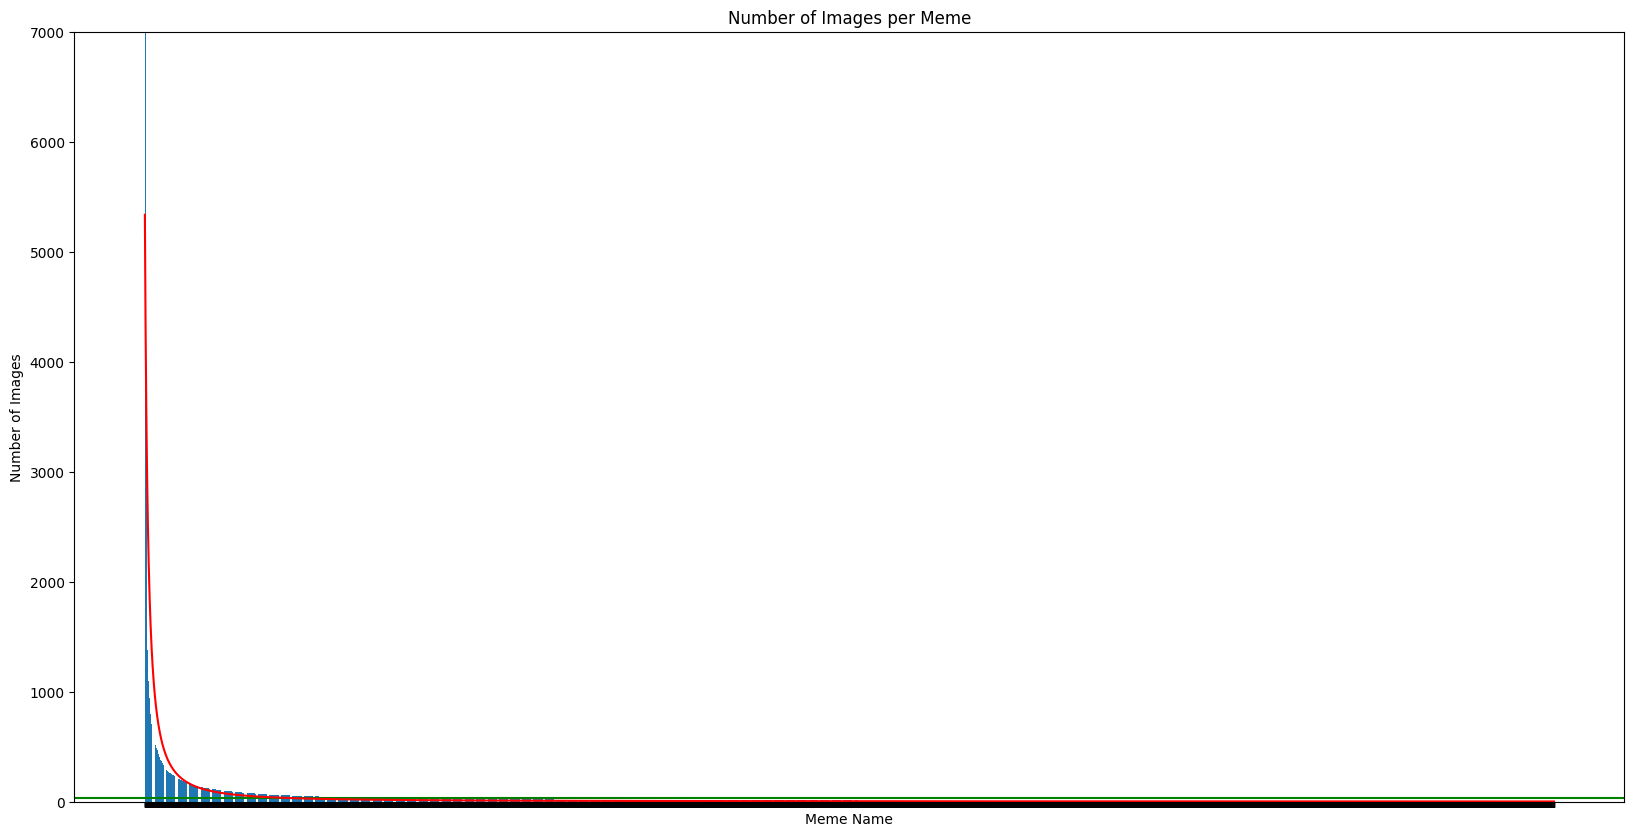

In [99]:
from scipy.stats import pareto, gamma
from matplotlib import pyplot as plt

# Let's find the best parameters. Need x, y data 'sampled' from the distribution for
# parameter fit.
y = []
memes_and_counts.head()
for i in range(memes_and_counts.shape[0]):
	for j in range(memes_and_counts.loc[i][1]):
		y.append(i) # just let y have index[artist] repeated for each song 

print("y prepared")
# sanity check. If the dataframe isn't sorted properly, y isn't either.
#pyplot.figure()
#pyplot.hist(y, bins=30)
        
param = pareto.fit(y, 100)
pareto_fitted = len(y)*pareto.pdf(range(memes_and_counts.shape[0]), *param)
# param = gamma.fit(y) # gamma fits abysmally; see for yourself by uncommenting
# gamma_fitted = len(y)*gamma.pdf(range(artists.shape[0]), *param)

plt.figure(figsize=(20, 10))
plt.bar(memes_and_counts['name'], memes_and_counts['image_count'])
plt.axhline(y=avg, color='g', linestyle='-')
plt.plot(pareto_fitted, color='r')
plt.ylim(0, 7000)
plt.xticks(visible=False)
plt.xlabel('Meme Name')
plt.ylabel('Number of Images')
plt.title('Number of Images per Meme')
plt.show()

In [107]:
dataframe = memes_and_counts.sort_values(by=['image_count'], ascending=True).reset_index(drop=True)
dataframe.head()

target = int(np.percentile(dataframe['image_count'], 75))
print(target)

22


In [108]:
df['image_count']

0          1
1          1
2         12
3          1
7         16
        ... 
31137     31
31138     10
31139     18
31140     44
31141    742
Name: image_count, Length: 31123, dtype: int64